# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
from sklearn import (datasets,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     neighbors)

In [3]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [4]:
pd.options.display.float_format = '{:20,.4f}'.format

# Diabetes Dataset

In [5]:
diabetes = datasets.load_diabetes()

In [6]:
tts = skms.train_test_split(diabetes.data,
                            diabetes.target,
                            test_size=.25)

(diabetes_train_ftrs, diabetes_test_ftrs,
 diabetes_train_tgt,  diabetes_test_tgt) = tts

In [8]:
# print(diabetes.DESCR)

In [9]:
diabetes_df = pd.DataFrame(diabetes.data,
                           columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


In [10]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


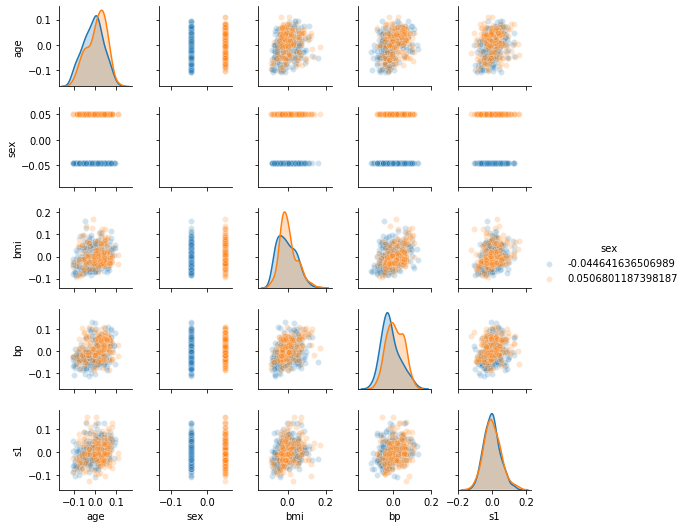

In [12]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']],
             height=1.5, 
             hue='sex', 
             plot_kws={'alpha':.2});

# Measures of Center

In [13]:
rolls = np.array([1,6,6,6,2,3,4,3,1])
np.mean(rolls)

3.5555555555555554

In [14]:
np.median(rolls)

3.0

In [15]:
mistake_rolls = np.array([1,6,6,16,2,3,4,3,1])
np.mean(mistake_rolls)

4.666666666666667

In [16]:
np.median(mistake_rolls)

3.0

In [17]:
values = np.array([5,7,9])
np.mean(values)

7.0

In [18]:
wgt = np.array([.5, .25, .25])
np.dot(wgt, values)

6.5

In [19]:
wgt = np.array([1/3, 1/3, 1/3])
np.dot(wgt, values)

7.0

# kNN Regression

In [20]:
# nearest neighbors .... I'm like the people around me
# find my close neighbors
# combine them to make a value for me

In [21]:
distances = np.array([4.0, 2.0, 2.0])
closeness = 1.0 / distances
closeness

array([0.25, 0.5 , 0.5 ])

In [22]:
weights = closeness / closeness.sum()
weights

array([0.2, 0.4, 0.4])

In [23]:
neigh_vals = np.array([79.1, 88.3, 101.2])
np.dot(neigh_vals, weights)

91.62

In [25]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = knn.predict(diabetes_test_ftrs)

metrics.mean_squared_error(diabetes_test_tgt, preds)

3471.41941941942

In [26]:
diabetes_df['target'].max() - diabetes_df['target'].min() 

321.0

In [27]:
np.sqrt(3471.42)

58.9187576243763

In [ ]:
# root mean squared error (RMSE)

# Linear Regression

In [28]:
def axis_helper(ax, lims):
    'clean up axes'
    ax.set_xlim(lims); ax.set_xticks([])
    ax.set_ylim(lims); ax.set_yticks([])
    ax.set_aspect('equal')

In [31]:
def process(D, model, ax):
    x,y = D[:,0], D[:,1]
    m,b = model   # y=mx+b
    
    axis_helper(ax, (0,8))
    
    # draws the data
    ax.plot(x,y,'ro')
    
    # drawing the line
    helper_xs   = np.array([0,8])
    helper_line = m * helper_xs + b  # y=mx+b
    ax.plot(helper_xs, helper_line, color='y')
    
    # calculate the errors
    predictions = m * x + b
    errors = y - predictions
    
    # plot errors
    ax.vlines(x, predictions, y)
    
    # return the results
    sse = np.dot(errors, errors)  # sum-of-squared-errors
    return (errors, errors.sum(), sse, np.sqrt(sse))


In [32]:
D = np.array([[3,5],
              [4,2]])

# very simple horizontal lines
# y=mx+b .... m is 0, line is horizontal
bs = np.array([1,2,3,3.5,4,5])
horizontal_lines = np.c_[np.zeros_like(bs),
                         bs]
horizontal_lines

array([[0. , 1. ],
       [0. , 2. ],
       [0. , 3. ],
       [0. , 3.5],
       [0. , 4. ],
       [0. , 5. ]])

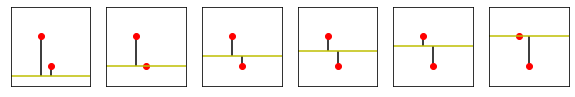

In [33]:
col_labels = ['Raw Errors', 'Sum', 'SSE', 'TotalDist']
fig, axes = plt.subplots(1,6,figsize=(10,5))
records = [process(D, mod, ax) for mod, ax in zip(horizontal_lines, 
                                                 axes.flat)]
df = pd.DataFrame.from_records(records, columns=col_labels)

In [34]:
df

,Raw Errors,Sum,SSE,TotalDist
0,"[4.0, 1.0]",5.0000,17.0000,4.1231
1,"[3.0, 0.0]",3.0000,9.0000,3.0000
2,"[2.0, -1.0]",1.0000,5.0000,2.2361
3,"[1.5, -1.5]",0.0000,4.5000,2.1213
4,"[1.0, -2.0]",-1.0000,5.0000,2.2361
5,"[0.0, -3.0]",-3.0000,9.0000,3.0000


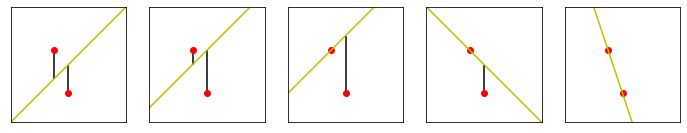

In [35]:
lines_mb = np.array([[ 1, 0],
                     [ 1, 1],
                     [ 1, 2],
                     [-1, 8],
                     [-3,14]])

fig, axes = plt.subplots(1,5,figsize=(12,6))
records = [process(D, mod, ax) for mod, ax in zip(lines_mb, 
                                                  axes.flat)]
df = pd.DataFrame.from_records(records, columns=col_labels)

In [36]:
lr = linear_model.LinearRegression()
fit = lr.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)

result = metrics.mean_squared_error(diabetes_test_tgt, 
                                    preds)
result, np.sqrt(result)

(2848.2953079329427, 53.36942296795931)